# Рынок заведений общественного питания Москвы

**Описание проекта**

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

**Последовательность выполнения проекта**

* Загрузка файлов, их изучение и подготовка к дальнейшему анализу
* Предобработка данных
* Исследовательский анализ данных:
    1. Исследовать соотношение видов объектов общественного питания по количеству
    2. Исследовать соотношение сетевых и несетевых заведений по количеству
    3. Выделить вид объекта общественного питания, для которого характерно сетевое распространение
    4. Выделить характерные черты для сетевых заведений (много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест)
    5. Для каждого вида объекта общественного питания описать среднее количество посадочных мест
    6. Выделить в отдельный столбец информацию об улице из столбца address
    7. Построить график топ-10 улиц по количеству объектов общественного питания. Воспользоваться внешней информацией и ответить на вопрос — в каких районах Москвы находятся эти улицы?
    8. Найти число улиц с одним объектом общественного питания. Воспользоваться внешней информацией и ответить на вопрос — в каких районах Москвы находятся эти улицы?
* Общий вывод по исследованию и дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментировать возможность развития сети.
* Подготовка презентации по проекту

## Изучение данных из файла

Импортируем нужные библиотеки и начнём изучение данных файла

In [1]:
#импорт нужных библиотек
import pandas as pd
from IPython.display import display
import warnings
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px
from io import BytesIO
import requests

#отключение уведомлений об ошибке при замене исходного набора данных
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#показ всех колонок датафрейма
pd.options.display.max_columns = None

#формат для чисел с плавающей точкой
pd.options.display.float_format = '{:,.2f}'.format

Сохраним данные в датафрейм df и посмотрим первые 5 строк

In [2]:
df = pd.read_csv('D:/Datasets/rest_data.csv')

In [3]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Сразу можно заметить кричащий верхний регистр в некоторых названиях заведений, в будущем это исправим

Подгружу сторонний файл с улицами и районами Москвы для будущего объединения с основной таблицей

In [4]:
# Все манипуляции прямиком из инструкции ментора
spreadsheet_id = '1xRzI4Pp5ZwZciGx_wlo3Lbiay84REmsuHUKGEuhu49E'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)

streets = pd.read_csv(BytesIO(r.content)) #сохраняем данные в датафрейм

In [5]:
streets.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


Займёмся описанием данных основного датафрейма `df`

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Пропусков в колонках нет, это радует

Всего в таблице `rest_data` 6 колонок, из них: 2 колонки типа `int64` и 4 колонки типа `object`

Согласно документации к данным:
* id — идентификатор объекта;
* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест.

In [7]:
df.describe()

,id,number
count,"15,366.00","15,366.00"
mean,"119,720.07",59.55
std,"73,036.13",74.74
min,838.00,0.00
25%,"28,524.00",12.00
50%,"144,974.50",40.00
75%,"184,262.25",80.00
max,"223,439.00","1,700.00"


**Вывод**

Описание данных даёт нам понимание о том, насколько отличается количество посадочных мест в разных заведениях. В таблице присутствуют и те, в которых совсем нет посадочных мест, и те, в которых больше тысячи посадочных мест, а так же все другие, что между этими двумя.  

## Предобработка данных

### Переименование столбцов

Переименуем столбцы с названием заведения и его типов для большего удобства

In [8]:
df = df.rename(columns={'object_name':'name', 'object_type':'type'})

### Обработка дубликатов

In [9]:
df.duplicated().sum()

0

Явных дубликатов не обнаружено, проверим на неявные по колонке `id`

In [10]:
df['id'].duplicated().sum()

0

Неявных дубликатов тоже не обнаружено

### Изменение типов данных

Изменим тип столбца с id (так как он не являетя числовым)

In [11]:
df['id'] = df['id'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       15366 non-null  object
 1   name     15366 non-null  object
 2   chain    15366 non-null  object
 3   type     15366 non-null  object
 4   address  15366 non-null  object
 5   number   15366 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 720.4+ KB


### Обработка категориальных значений

Приведём столбец `object_name` к нижнему регистру для удобства и поменеям названия двух типов заведений так же для удобства

In [12]:
df['name'] = df['name'].str.lower()
df['type'] = df['type'].replace('предприятие быстрого обслуживания','фастфуд')
df['type'] = df['type'].replace('магазин (отдел кулинарии)','отдел кулинарии')

df.head()

,id,name,chain,type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


**Вывод**

Данные успешно предобработаны

## Исследовательский анализ данных

### Предварительный анализ

Построим диаграмму размаха по количеству посадочных мест для создания датафрейма для дальнейшего анализа

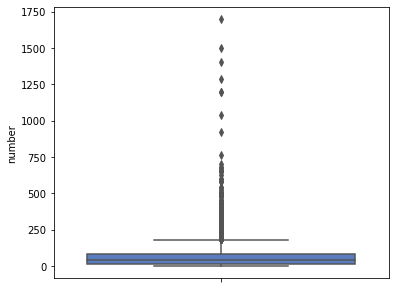

In [13]:
sns.set_palette('muted') 
plt.figure(figsize=(6,5))
sns.boxplot(y='number', data=df)
plt.show()

Выбросим аномальные значения по столбцу `number`, которые привышают сумму третьего квартиля и полтора межкватрительного размаха

In [14]:
df['number'].describe()['75%'] + 1.5*(df['number'].describe()['75%']-df['number'].describe()['25%'])

182.0

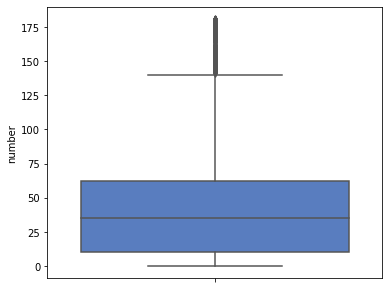

In [15]:
plt.figure(figsize=(6,5))
rest = df.query('number < 182') 

sns.boxplot(y='number', data=rest)
plt.show()

Получили новый отфильтрованный датафрейм `rest`, его используем для дальнейшего анализа

### Исследование соотношения видов объектов общественного питания по количеству

С помощью `groupby` построим сводную таблицу, в которую войдут тип заведения и его общее количество

In [16]:
type_df = rest.groupby(['type'])['type'].count().sort_values(ascending=False).reset_index(name='count')
type_df

,type,count
0,кафе,6031
1,ресторан,2059
2,фастфуд,1907
3,столовая,1836
4,бар,847
5,буфет,557
6,кафетерий,397
7,закусочная,359
8,отдел кулинарии,273


Можно увидеть, что по типу заведений больше всего кафе (6031), ресторанов (2059), заведений быстрого питания (1907) и столовых (1836)

Теперь построим круговую диаграмму по данной таблице

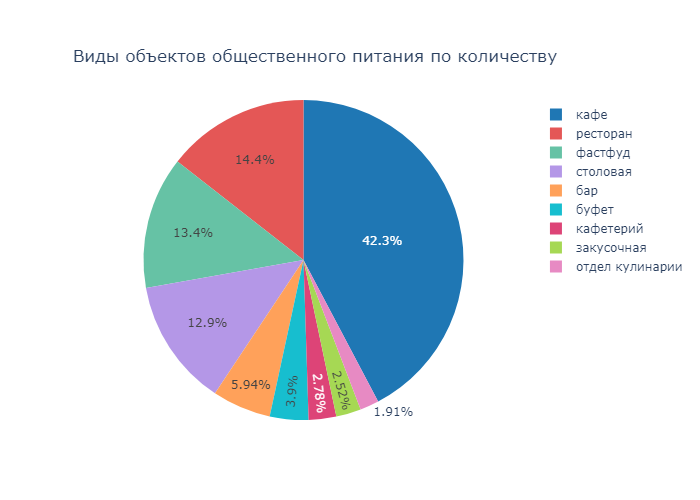

In [17]:
colors = ['#1f77b4', '#e45756', 'rgb(102,194,165)','rgb(180, 151, 231)', '#ffa15a',
          '#17becf', '#dd4477', 'rgb(166,216,84)', 'rgb(231,138,195']
fig = go.Figure(data=[go.Pie(labels=type_df['type'], values=type_df['count'])])

fig.update_layout(
    title={
        'text': "Виды объектов общественного питания по количеству",
        'y':0.9,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_traces(marker=dict(colors=colors))

config = {
        'toImageButtonOptions': {
            'format': 'png', 
            'height': 480,
            'width': 640,
            'scale': 2
        }
}

fig.show("png") 

**Вывод**

По круговой диаграмме можно увидеть, что из всех видов объектов общественного питания больше всего кафе (42.3%). Затем идут рестораны (14.4%), заведения быстрого питания (13.4%) и столовые (12.9%). Остальных видов объектов уже значительно меньше (<6%).

### Исследование соотношения сетевых и несетевых заведений по количеству

Аналогично предыдущему пункту создадим сводную таблицу по сетевым и несетевым заведениям

In [18]:
is_chain_df = rest.groupby(['chain'])['chain'].count().sort_values(ascending=False).reset_index(name='count')
is_chain_df

,chain,count
0,нет,11402
1,да,2864


Несетевых заведений намного больше (11402), чем сетевых (2864)

Теперь строим график

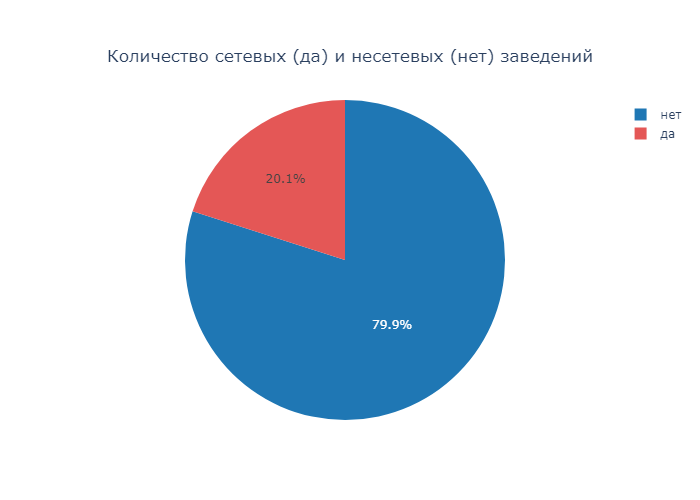

In [19]:
colors = ['#1f77b4', '#e45756']
fig = go.Figure(data=[go.Pie(labels=is_chain_df['chain'], values=is_chain_df['count'])])

fig.update_layout(
    title={
        'text': "Количество сетевых (да) и несетевых (нет) заведений",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_traces(marker=dict(colors=colors))

config = {
        'toImageButtonOptions': {
            'format': 'png', 
            'height': 480,
            'width': 640,
            'scale': 2
        }
}

fig.show("png") 

**Вывод**

По круговой диаграмме можно заключить, что сетевых заведений практически в 4 раза меньше, чем несетевых (20.1% и 79.9% соответственно).

### Исследование сетевых заведения по виду

Ещё одна сводная таблица, в неё войдут виды заведений, которые являются сетевыми

In [20]:
сhain_est = rest.query('chain == "да"')
chain_est_df = сhain_est.groupby(['type'])['type'].count().sort_values(ascending=False).reset_index(name='count_chain')
chain_est_df

,type,count_chain
0,кафе,1369
1,фастфуд,776
2,ресторан,482
3,отдел кулинарии,78
4,закусочная,56
5,кафетерий,52
6,бар,37
7,буфет,11
8,столовая,3


Больше всего кафе (1369), заведения быстрого питания (776) и ресторанов (482), если рассматривать в разрезе сетевых заведений

Теперь строим круговую диаграмму по полученной таблице

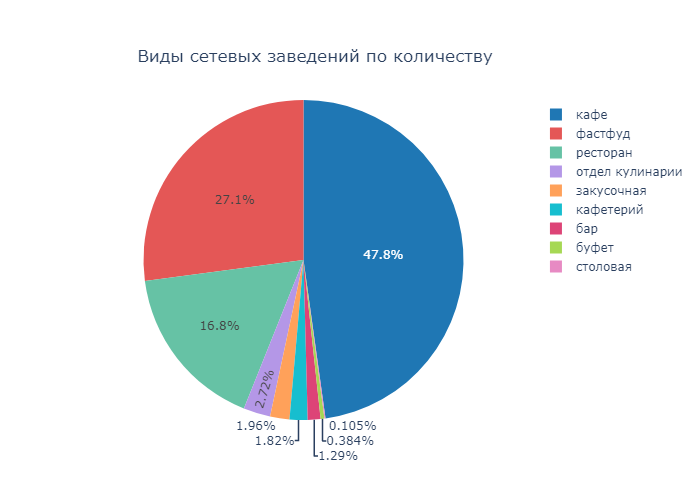

In [21]:
colors = ['#1f77b4', '#e45756', 'rgb(102,194,165)','rgb(180, 151, 231)', '#ffa15a',
          '#17becf', '#dd4477', 'rgb(166,216,84)', 'rgb(231,138,195']
fig = go.Figure(data=[go.Pie(labels=chain_est_df['type'], values=chain_est_df['count_chain'])])

fig.update_layout(
    title={
        'text': "Виды сетевых заведений по количеству",
        'y':0.9,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_traces(marker=dict(colors=colors))

config = {
        'toImageButtonOptions': {
            'format': 'png', 
            'height': 480,
            'width': 640,
            'scale': 2
        }
}

fig.show("png") 

**Вывод**

Наиболее характерно сетевое распространение для кафе (48.5%), заведений быстрого питания (27.1%) и ресторанов (16.8%)

Теперь построим круговую диаграмму доли сетевых заведений в отношении к общему количеству заведений

In [22]:
chain_est_df1 = rest.groupby(['type'])['type'].count().sort_values(ascending=False).reset_index(name='count_total')
chain_est_df1 = chain_est_df1.merge(chain_est_df, on='type')
chain_est_df1['perc'] = chain_est_df1['count_chain'] / chain_est_df1['count_total']
chain_est_df1.sort_values(by='perc', ascending=False)

,type,count_total,count_chain,perc
2,фастфуд,1907,776,0.41
8,отдел кулинарии,273,78,0.29
1,ресторан,2059,482,0.23
0,кафе,6031,1369,0.23
7,закусочная,359,56,0.16
6,кафетерий,397,52,0.13
4,бар,847,37,0.04
5,буфет,557,11,0.02
3,столовая,1836,3,0.00


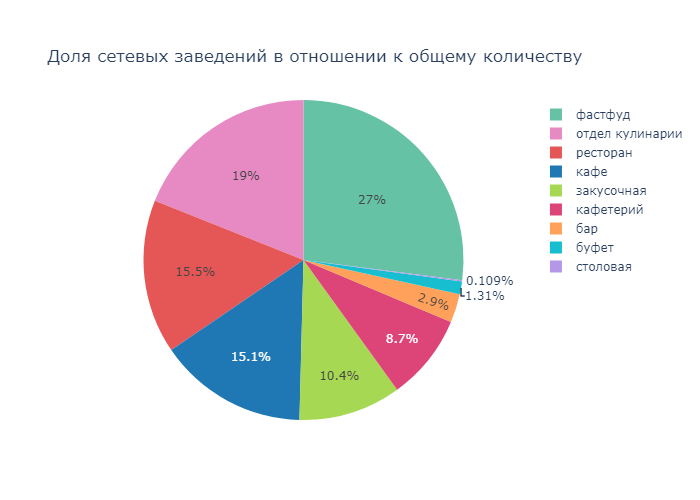

In [23]:
colors = ['#1f77b4', '#e45756', 'rgb(102,194,165)','rgb(180, 151, 231)', '#ffa15a',
          '#17becf', '#dd4477', 'rgb(166,216,84)', 'rgb(231,138,195']
fig = go.Figure(data=[go.Pie(labels=chain_est_df1['type'], values=chain_est_df1['perc'])])

fig.update_layout(
    title={
        'text': "Доля сетевых заведений в отношении к общему количеству",
        'y':0.9,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_traces(marker=dict(colors=colors))

config = {
        'toImageButtonOptions': {
            'format': 'png', 
            'height': 480,
            'width': 640,
            'scale': 2
        }
}

fig.show("png") 

**Выводы**

Если смотреть на долю сетевых заведений в отношении к общему количесту заведений определенного типа, то тут достаточно сильно меняется картина. Никаких 50% у кафе даже близко нет, здесь имеем только 15%, отдел кулинарии резко вырывается вперёд с 19.3% (было 2.72%), почти у всех остальных видов заведений тоже изменились проценты по сравнению с прошлым графиком. Рестораны (15.5%), заведения быстрого питания(27%) и столовые остались примерно на том же процентном уровне (0.1%).

### Что характерно для сетевых заведений?

Построим гистограмму распределения количества сетевых заведений в зависимости от количества посадочных мест

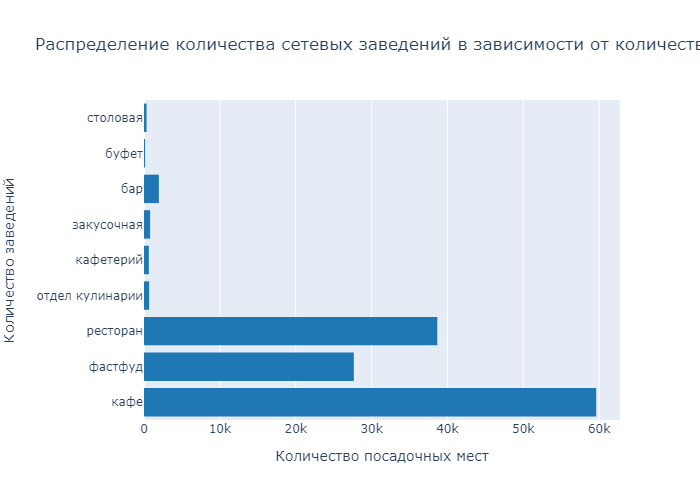

In [24]:
fig = px.histogram(сhain_est, x='number', y='type',
                   title='Распределение количества сетевых заведений в зависимости от количества посадочных мест',
                   color_discrete_sequence=px.colors.qualitative.D3)

fig.update_xaxes(title_text='Количество посадочных мест')
fig.update_yaxes(title_text='Количество заведений')

config = {
        'toImageButtonOptions': {
            'format': 'png', 
            'height': 500,
            'width': 1000,
            'scale': 3
        }
}
fig.show("png")

**Вывод**

Для сетевых заведений наиболее характерно большое количество заведений с небольшим количеством посадочных мест (0-4), чуть  менее характерно большее количество мест (10-24). Ещё менее характерно для сетей среднее количество заведений со средним количеством посадочных мест (25-54)

### Описание среднего количества посадочных мест для каждого вида заведения

Опишем среднее количество посадочных мест с помощью сводной таблицы и столбчатого графика

In [25]:
rest.pivot_table(columns='type', values='number')

type,бар,буфет,закусочная,кафе,кафетерий,отдел кулинарии,ресторан,столовая,фастфуд
number,39.70,41.84,7.03,37.43,8.64,5.59,74.51,82.05,18.47


In [26]:
rest_sorted = rest.groupby('type', as_index=False)['number'].agg('mean').sort_values(by='number',ascending=False)

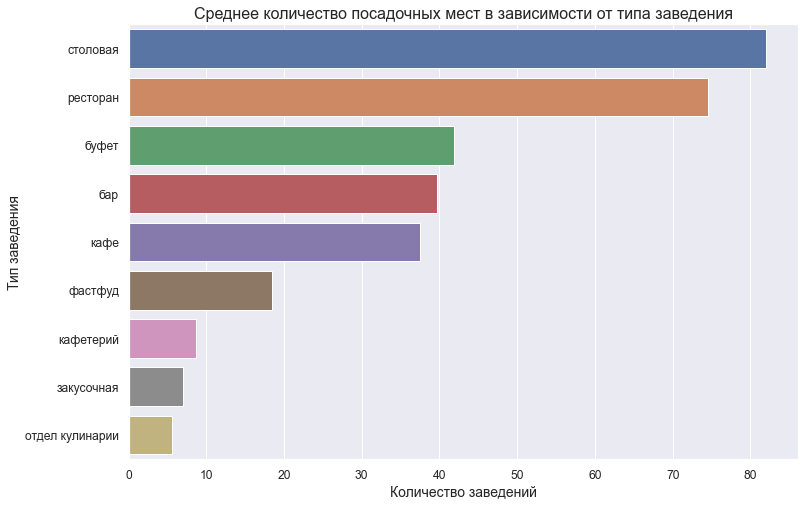

In [27]:
plt.figure(figsize=(12,8))
sns.set(font_scale = 1.1)

ax = sns.barplot(x='number', y='type', data=rest_sorted, ci=None)

ax.set_xlabel('Количество заведений', fontsize = 14)
ax.set_ylabel('Тип заведения', fontsize = 14)
ax.set_title('Среднее количество посадочных мест в зависимости от типа заведения', fontsize=16)
plt.show()

In [28]:
rest_sorted

,type,number
7,столовая,82.05
6,ресторан,74.51
1,буфет,41.84
0,бар,39.70
3,кафе,37.43
8,фастфуд,18.47
4,кафетерий,8.64
2,закусочная,7.03
5,отдел кулинарии,5.59


**Вывод**

Сводная таблица и график дают нам такие результаты:

* Самое большое среднее количество посадочных мест находится в столовых (82) и ресторанах (75)
* Далее идут буфеты (42), бары (40) и кафе (37)
* Все остальные виды заведений предоставляют уже значительно меньшее количество посадочных мест (<20)

### Выделение улицы в отдельный столбец

Выделим название улицы в отдельным столбец в нашем основном датафрейме

In [29]:
rest['streetname'] = rest['address'].str.partition(',')[2]
rest['streetname'] = rest['streetname'].str.partition(',')[0]
rest['streetname'] = rest['streetname'].str.strip() #удаление пробелов

In [30]:
rest.head()

,id,name,chain,type,address,number,streetname
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


### Добавление районов в общую таблицу

Оставим в датафрейме `streets` только нужные нам колонки - название улицы и района

In [31]:
streets = streets[['streetname', 'area']]
streets.head()

,streetname,area
0,Выставочный переулок,Пресненский район
1,улица Гашека,Пресненский район
2,Большая Никитская улица,Пресненский район
3,Глубокий переулок,Пресненский район
4,Большой Гнездниковский переулок,Пресненский район


Объединеям основной датафрейм `rest` с датафреймом `streets` по названию улицы

In [32]:
rest = rest.merge(streets, on='streetname', how='left').drop_duplicates(subset='id')
rest = rest.dropna(subset=['area']) #выбросим пропуски в колонке area
rest.head()

,id,name,chain,type,address,number,streetname,area
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Ярославский Район
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Таганский район
4,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица,Таганский район
5,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,Район Лианозово
6,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,Район Лианозово


### Топ 10 улиц по количеству объектов общественного питания

Выделим топ 10 улиц по количеству объектов общественного питания

In [33]:
rest = rest.query('streetname != "город Зеленоград"')
top_streets = rest['streetname'].value_counts().head(10)
top_streets_dict = top_streets.to_dict()

Создадим датафрейм, в который добавим название улицы, количество заведений на ней и район, где находится эта улица.

In [34]:
top_streets_df = rest[rest['streetname'].isin(top_streets_dict.keys())]
top_streets_grouped = (top_streets_df.groupby(['streetname','area'])['streetname'].count()
                                     .sort_values(ascending=False).reset_index(name='count'))
top_streets_grouped

,streetname,area,count
0,проспект Мира,Алексеевский район,193
1,Профсоюзная улица,Академический район,173
2,Ленинградский проспект,Район Аэропорт,167
3,Пресненская набережная,Пресненский район,160
4,Варшавское шоссе,Район Чертаново Центральное,152
5,Ленинский проспект,Район Проспект Вернадского,137
6,проспект Вернадского,Район Проспект Вернадского,124
7,Каширское шоссе,Район Москворечье-Сабурово,105
8,Кутузовский проспект,Район Дорогомилово,105
9,Ходынский бульвар,Хорошевский район,101


Теперь построим график 

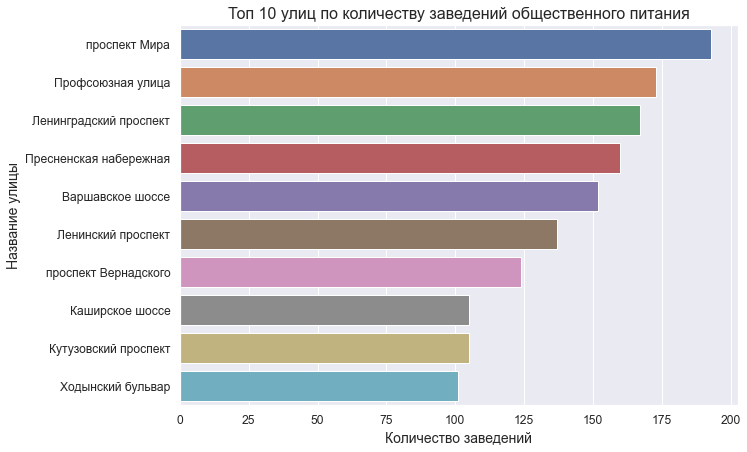

In [35]:
plt.figure(figsize=(10,7))

ax = sns.barplot(x='count',y='streetname', data=top_streets_grouped, ci=None)
ax.set_xlabel('Количество заведений', fontsize = 14)
ax.set_ylabel('Название улицы', fontsize = 14)
ax.set_title('Топ 10 улиц по количеству заведений общественного питания', fontsize=16)

plt.show()

**Вывод**

Графики наглядно показывает топ 10 улиц по количеству заведений общественного питания. Лидером по количеству заведений оказался проспект Мира и Алексеевский район соответственно.

### Улицы с одним заведением

Посчитаем количество улиц, на которых находится всего одно заведение

In [36]:
one_est = rest['streetname'].value_counts()[rest['streetname'].value_counts()==1]
one_est.count()

498

Получили целых 498 улиц!

Теперь с помощью сводной таблицы выделим топ 10 райнонов по количеству улиц с одним заведением

In [37]:
one_est_dict = one_est.to_dict()
one_est_df = rest[rest['streetname'].isin(one_est_dict.keys())]
one_est_df.groupby(['area'])['area'].count().sort_values(ascending=False).reset_index(name='count').head(10)

,area,count
0,Таганский район,27
1,Басманный район,24
2,Район Хамовники,23
3,Тверской район,21
4,Пресненский район,20
5,Район Марьина роща,15
6,Район Сокольники,15
7,Район Арбат,14
8,Мещанский район,13
9,Район Замоскворечье,13


**Вывод**

Лидерами по количеству улиц с одним заведением стали районы Таганский, Басманный и Хамовники

### Распределение количества посадочных мест для улиц с большим количеством заведений

Создадим датафрейм, в котором оставим топ 30 улиц по количеству заведений

In [38]:
top_streets2 = rest['streetname'].value_counts().head(30)
top_streets2_dict = top_streets2.to_dict()
top_streets2_df = rest[rest['streetname'].isin(top_streets2_dict.keys())].sort_values(by='number', ascending=False)

In [39]:
top_streets2_grouped = top_streets2_df.groupby(
    'streetname', as_index=False)['number'].agg('mean').sort_values(by='number',ascending=False)

Построим столбчатый график, которые покажет среднее количество посадочных мест для каждой улицы

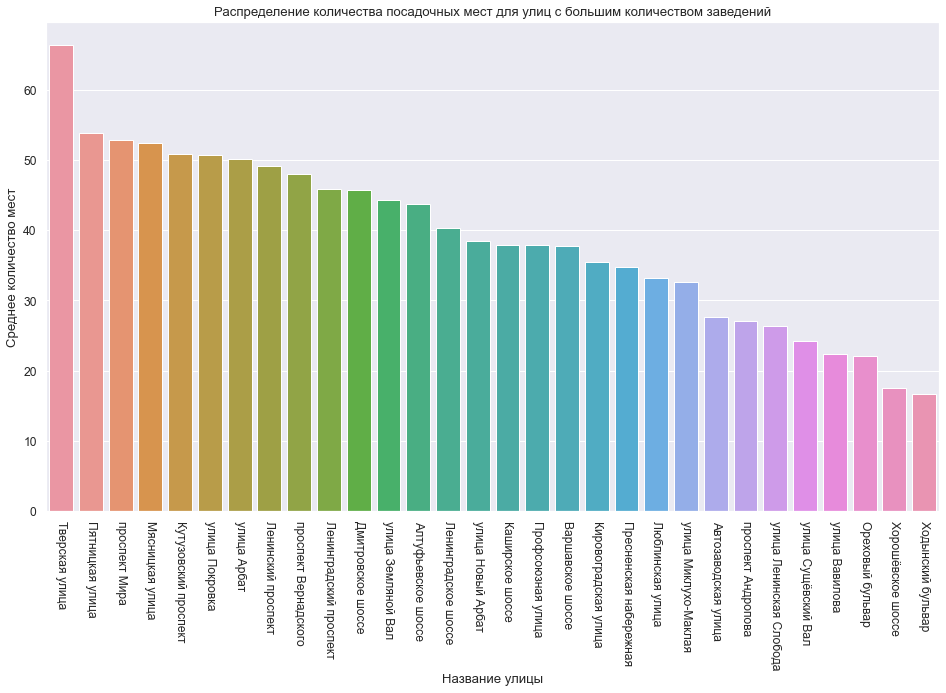

In [40]:
plt.figure(figsize=(16,9))
plt.xticks(rotation=-90)

ax = sns.barplot(x='streetname',y='number', data=top_streets2_grouped, ci=None)
ax.set(xlabel='Название улицы', ylabel='Среднее количество мест', 
       title='Распределение количества посадочных мест для улиц с большим количеством заведений')
plt.show()

**Вывод**

Какие закономерности видны на графике:

* В среднем на шоссе и проспектах наблюдается большее количество мест, чем на улицах (что логично, учитывая размер шоссе и проспектов)
* Часть из улиц, попавших в этот топ 30, являются центральными. Неудивительно, в центре всегда есть спрос на заведения общественного питания
* Часть из улиц находятся на достаточном расстоянии от центра. Могу сделать предположение, что они здесь оказались, так как находятся в густонаселенных районах Москвы

Построим тот же график, но в разрезе сетевых и несетевых заведений

In [41]:
top_streets2_grouped_2 = top_streets2_grouped = top_streets2_df.groupby(
    ['streetname', 'chain'], as_index=False)['number'].agg('mean').sort_values(by='number',ascending=False)

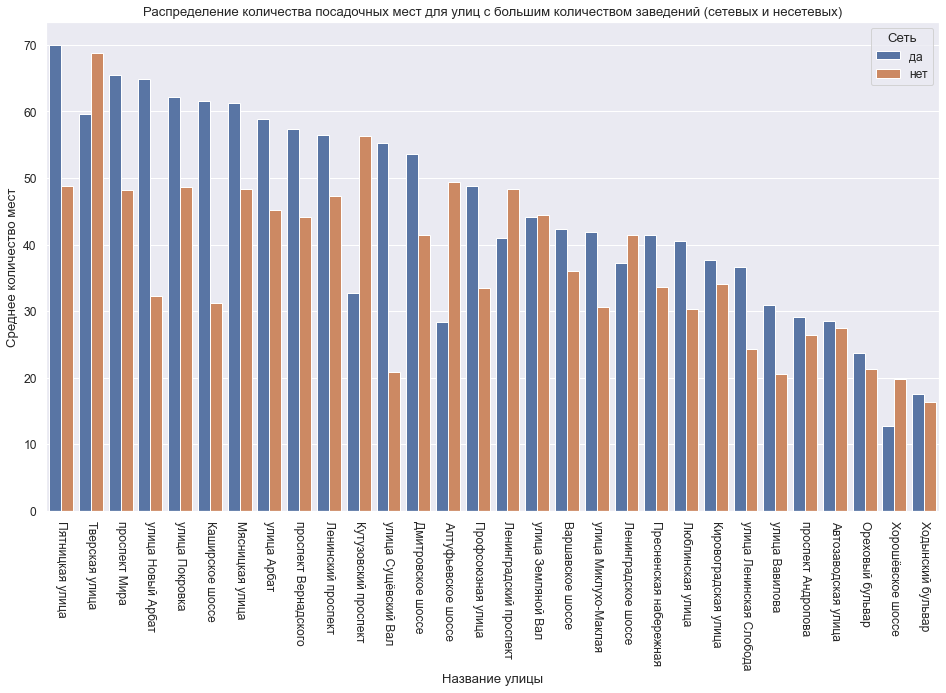

In [42]:
plt.figure(figsize=(16,9))
plt.xticks(rotation=-90)

ax = sns.barplot(x='streetname',y='number',hue='chain', data=top_streets2_grouped_2, ci=None)
ax.set(xlabel='Название улицы', ylabel='Среднее количество мест', 
       title='Распределение количества посадочных мест для улиц с большим количеством заведений (сетевых и несетевых)')
ax.legend(title="Сеть")

plt.show()

**Вывод**

Если рассматривать предыдущий график, но в разрезе сетевых и несетевых заведений, то можно заметить, что в сетевых заведениях практически во всех случаях (23 против 7) больше посадочных мест, чем в несетевых заведениях.

## Общий вывод

* Основываясь на результатах исследования, можно сделать вывод о том, что самым перспективным видом заведения является кафе, так как их наибольшее количество, как по общему счёту (42.3%), так и по сетевому (48.5%). Менее перспективными являются рестораны и заведения быстрого питания, так как их меньше как по общему количеству (14.4% и 13.4%), так и по и сетевому (16.6% и 26.3%) соответственно

* Если говорить о количество посадочных мест в перспективном кафе, то можно сказать, что оптимальным для данного вида заведения будет либо совсем небольшое количество посадочных мест (до 4), либо среднее количество (10-24)

* Перспективным районами являются Алексеевский, Академический, Аэропорт и Пресненский. Этот вывод можно сделать по большому количеству заведений, которые находятся в этих районах

* Так же можно сказать, основываясь на количестве сетевых кафе, что развивать сеть кафе и открывать новые филиалы в других районах является весьма перспективным

* Стоит заметить, что для полноценного анализа не помешали бы еще и данные о бюджете.

## Презентация

Ссылка на презентацию:

https://drive.google.com/file/d/1RFw-xlre1rvRh968YVfn_jcBKDJ0KT3x/view?usp=sharing